## Parallel coordinates plots

These plots essentially allow you to visualize a high dimensional scatterplot in 2-D by laying out the axis and then for each sample connecting its values with a line. Samples with similar line shapes are similar in some sense.

In [5]:
import pandas as pd
import os, sys, glob, inspect
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from importlib import reload
from sklearn.preprocessing import StandardScaler, MinMaxScaler

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc


In [6]:
# Otherwise jupyter ignores changes to the module
reload(mc)

<module 'epri_mc_lib' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

In [3]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

# Since highly correlated only use one absorption measurement
merged_tube = merged_tube.drop(columns=epri_mc_lib.drop_list_absorption_500_200)
merged_pipe = merged_pipe.drop(columns=epri_mc_lib.drop_list_absorption_100)


In [10]:
measures_list = ["TEP_mean_uV_C","backscatter_avg","Absorption_avg_50","A","B","p","median_CF","median_perm","median_MBN"]
errors_list = ["TEP_error_uV_C","backscatter_std","Absorption_std_50","A std","B std","p std"]

merged_tube["AUC_avg"] = mc.findAUC(merged_tube, merged_tube['A'], merged_tube['B'], merged_tube['p'])

data_tube = merged_tube[mc.minimal_informative_features]
merged_tube_errors = merged_tube[errors_list]

# there is no error value for these measures
for col in "cf_std","mbn_std","perm_std":
    merged_tube_errors[col] = 0
    merged_tube[col] = 0

merged_tube_lower_bounds,merged_tube_upper_bounds = epri_mc_lib.calc_error_bounds(merged_tube, measures_list, errors_list + ["cf_std","mbn_std","perm_std"])

/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:

scaled_tube, scaler = epri_mc_lib.scale_general(data_tube, MinMaxScaler())
scaled_tube['condition'] = scaled_tube.index
# Ignoring the error bounds for now
#scaled_tube_min_boundary = transform_df(scaler, data_tube_min_boundary)
#scaled_tube_max_boundary = transform_df(scaler, data_tube_max_boundary)
#scaled_tube_min_boundary['condition'] = scaled_tube.index
#scaled_tube_max_boundary['condition'] = scaled_tube.index


Text(0.5, 1.0, 'Tubes (Known)')

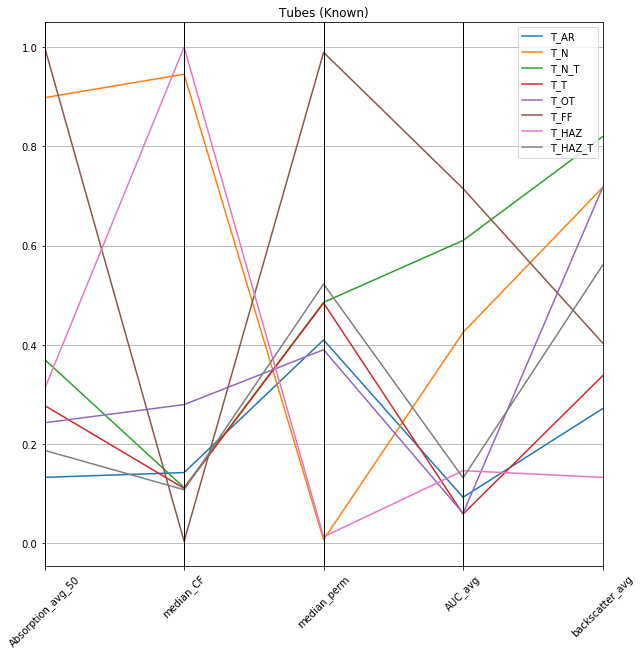

In [13]:
plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[8:16,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
# Plots the error bars but the figure becomes too noisy
#parallel_coordinates(scaled_tube_max_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
#parallel_coordinates(scaled_tube_min_boundary.iloc[8:16,],class_column="condition", alpha=.2,color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes (Known)")


Text(0.5, 1.0, 'Tubes (Unknown)')

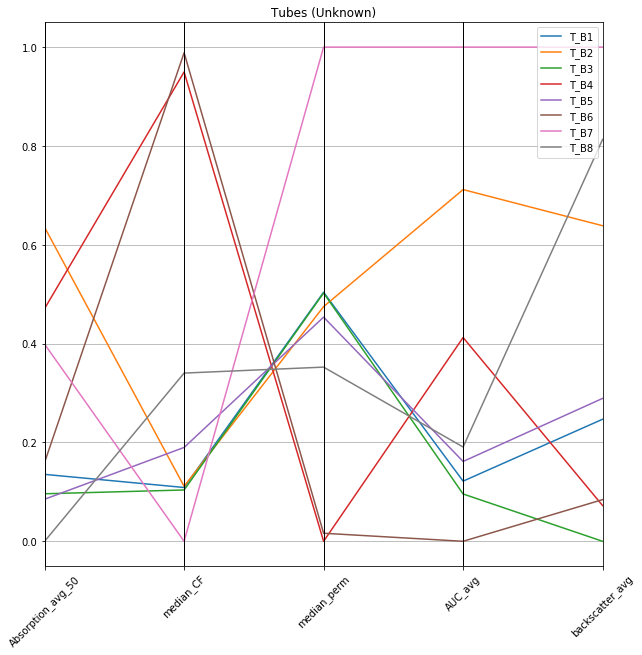

In [14]:

plt.figure(figsize=(10,10))
parallel_coordinates(scaled_tube.iloc[:8,],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
plt.xticks(rotation=45)
plt.title("Tubes (Unknown)")


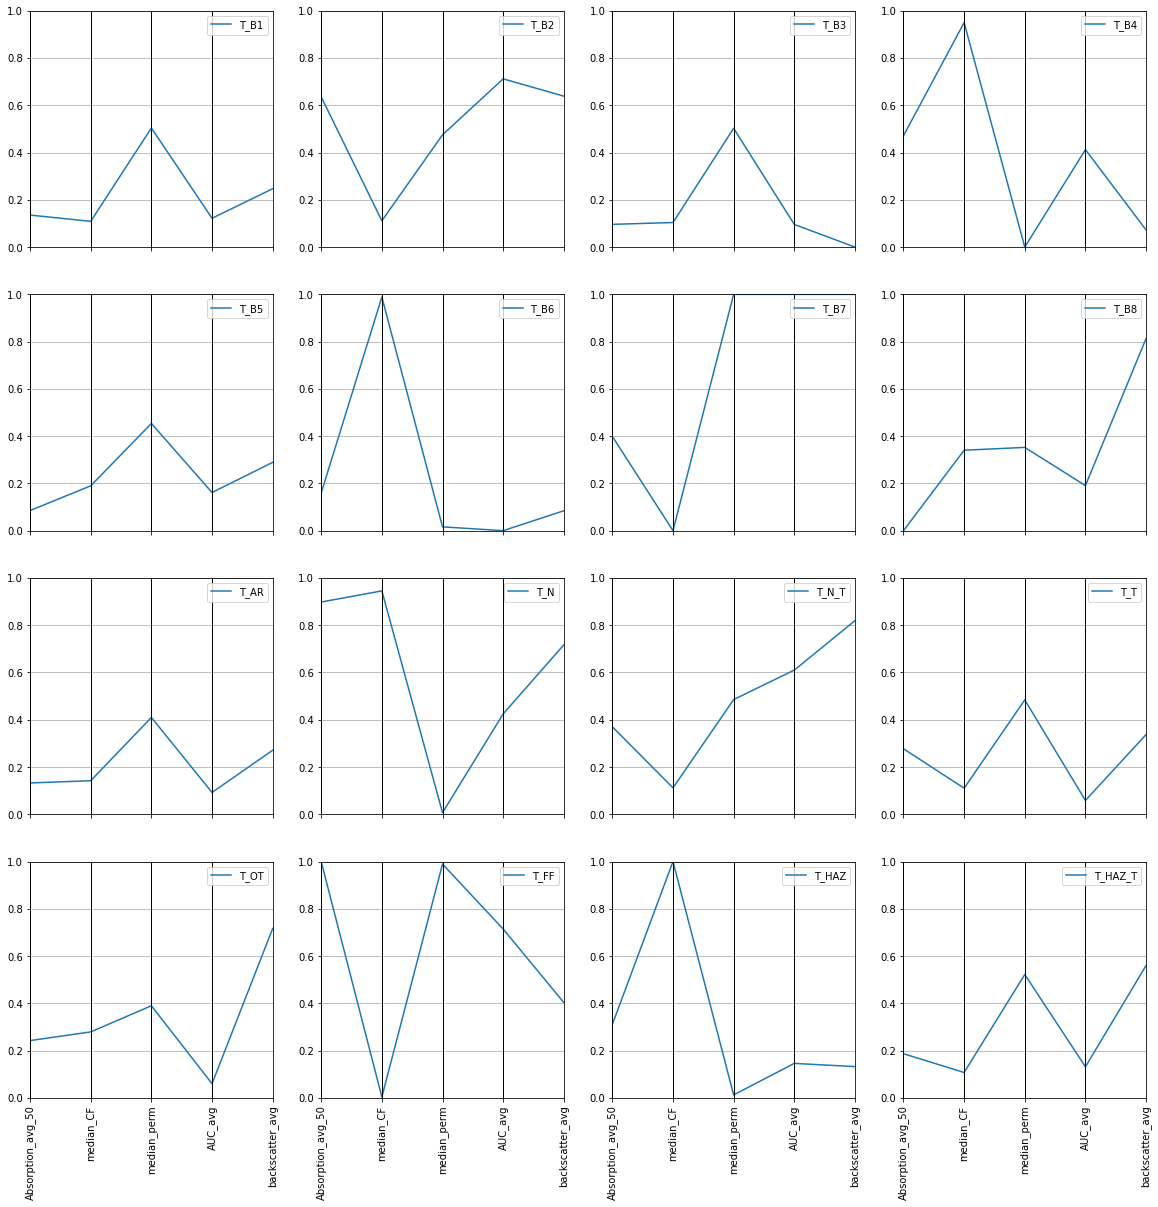

In [15]:
fig = plt.figure(figsize=(20,20))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    if i < 12:
        plt.setp(ax.get_xticklabels(), visible=False)
    parallel_coordinates(scaled_tube.iloc[i:(i+1),],class_column="condition",color=matplotlib.colors.TABLEAU_COLORS)
    plt.xticks(rotation=90)
    plt.ylim(0,1)
